Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [b]


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 40 seconds.
There were 7272 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7471 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8845228618772246, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


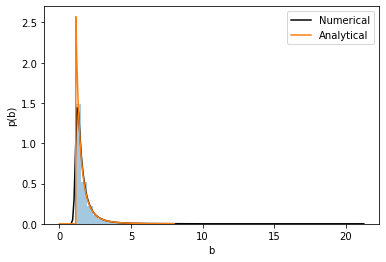

In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import numpy as np
from scipy import stats

ss = np.linspace(0,8,1000)
with pm.Model():
    b = pm.Pareto('b',alpha = 2 ,m = 1) # b = prior
    obs = pm.Uniform('obs',0,upper = b,observed = 1.138)
    trace = pm.sample(20000)
tracee = trace['b']
analytical = stats.pareto.pdf(ss,3,scale = 1.138) # m in pm.pareto is scale in stats.pareto
sns.distplot(tracee,kde_kws={'color':'k'})
plt.plot(ss,analytical)
plt.xlabel('b')
plt.ylabel('p(b)')
plt.legend(['Numerical','Analytical'])
plt.show()